<a href="https://colab.research.google.com/github/pniedziela/regresja_liniowa_projekt/blob/main/Praca_zaliczeniowa_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
# Objasnienie zbioru danych:

# File descriptions
# train.csv - the training set
# test.csv - the test set
# Data fields
# Here's a brief version of what you'll find in the data description file.

# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
# MSSubClass: The building class
# MSZoning: The general zoning classification
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# Street: Type of road access
# Alley: Type of alley access
# LotShape: General shape of property
# LandContour: Flatness of the property
# Utilities: Type of utilities available
# LotConfig: Lot configuration
# LandSlope: Slope of property
# Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to main road or railroad
# Condition2: Proximity to main road or railroad (if a second is present)
# BldgType: Type of dwelling
# HouseStyle: Style of dwelling
# OverallQual: Overall material and finish quality
# OverallCond: Overall condition rating
# YearBuilt: Original construction date
# YearRemodAdd: Remodel date
# RoofStyle: Type of roof
# RoofMatl: Roof material
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet
# ExterQual: Exterior material quality
# ExterCond: Present condition of the material on the exterior
# Foundation: Type of foundation
# BsmtQual: Height of the basement
# BsmtCond: General condition of the basement
# BsmtExposure: Walkout or garden level basement walls
# BsmtFinType1: Quality of basement finished area
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinType2: Quality of second finished area (if present)
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# Heating: Type of heating
# HeatingQC: Heating quality and condition
# CentralAir: Central air conditioning
# Electrical: Electrical system
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# GrLivArea: Above grade (ground) living area square feet
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade
# Bedroom: Number of bedrooms above basement level
# Kitchen: Number of kitchens
# KitchenQual: Kitchen quality
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Functional: Home functionality rating
# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality
# GarageType: Garage location
# GarageYrBlt: Year garage was built
# GarageFinish: Interior finish of the garage
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# GarageQual: Garage quality
# GarageCond: Garage condition
# PavedDrive: Paved driveway
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet
# PoolQC: Pool quality
# Fence: Fence quality
# MiscFeature: Miscellaneous feature not covered in other categories
# MiscVal: $Value of miscellaneous feature
# MoSold: Month Sold
# YrSold: Year Sold
# SaleType: Type of sale
# SaleCondition: Condition of sale

In [103]:
# Import uzywanych bibliotek 
import numpy as np 
import pandas as pd
from math import sqrt
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy import stats


In [104]:
# Krotka EDA (exploratory data analyses) na wybranym zbiorze danych (na przykladzie treningowego zbioru)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [106]:
# Jak widac obecne sa takie atrybuty jak "PoolQC" gdzie znajduje sie jedynie kilka wartosci, dodatkowo nie wszystkie atrybuty beda miec 
#znaczacy wplyw na predykcje, z tego względu usunięte zostaną wszystkie features gdzie brakujace dane stanowia >30% 
train = train[[column for column in train if train[column].count() / len(train) >= 0.3]]
test = test[[column for column in test if test[column].count() / len(test) >= 0.3]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


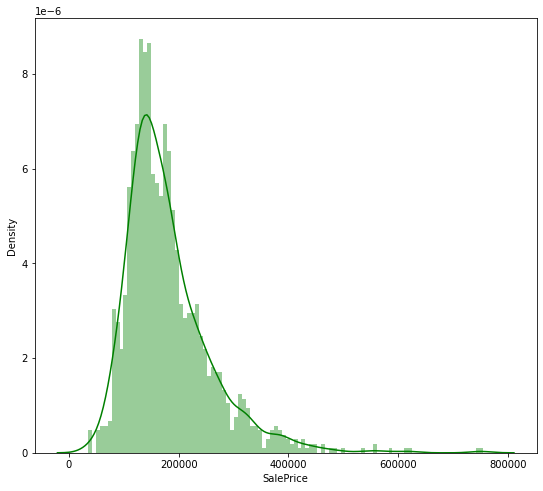

In [107]:
# Sprawdzby dystrybuje cen domow: 
train['SalePrice'].describe()
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [108]:
# Widac asymetrie prawostronna oraz wartosci odstajace, dla modelu potrzebne bedzie pozbycie sie ich 

In [109]:
# Zrobmy ta sama analize dla reszty atrybutów (tylko dla tych o wartosciach numerycznych):
list(set(train.dtypes.tolist()))
train_numeric = train.select_dtypes(include = ['float64', 'int64'])
train_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


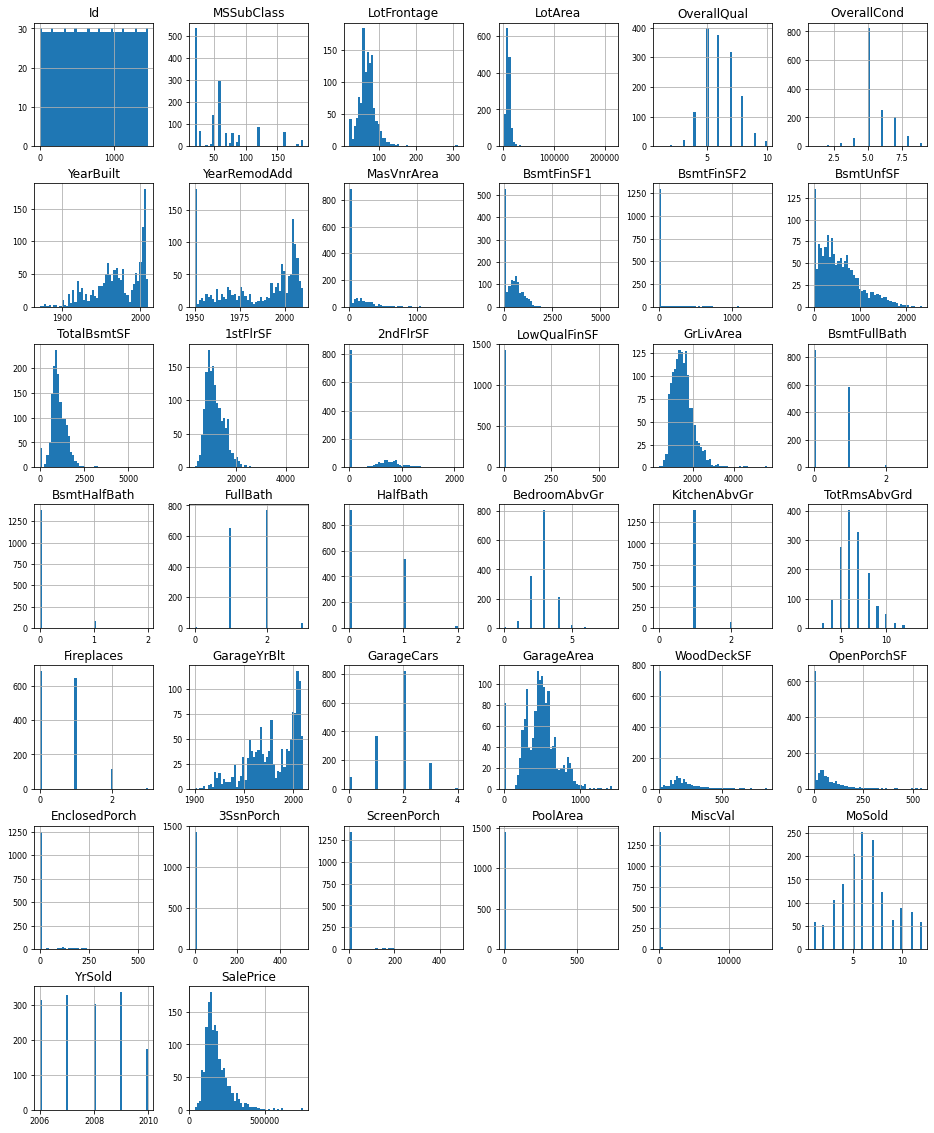

In [110]:
train_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [111]:
# Czesc z histogramow wykazuje duze podobienstwo do "SalesPrice" w swoim rozkladzie, 
# w zwiazku z czym nastepnym krokiem bedzie znalezienie takich atrybutów które wykazuja 
# silna korelacje z "SalesPrice" oraz stworzenie z nich ostatecznej listy atrybutów modelu 
train_numerlical_correlation= train_numeric.corr()['SalePrice'][:-1]
final_features_list = train_numerlical_correlation[abs(train_numerlical_correlation) > 0.5].sort_values(ascending=False)
print("Istnieje {} silnie skorelowanych atrybutów z SalePrice:\n{}".format(len(final_features_list), final_features_list))

Istnieje 10 silnie skorelowanych atrybutów z SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Text(0.5, 0, 'OverallQual (Ogolna jakosc mieszkania)')

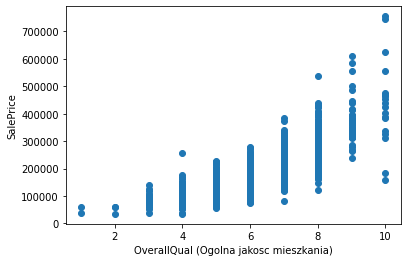

In [112]:
# Zilustryjmy trzy atrybuty o najwyzszej korelacji 
plt.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('OverallQual (Ogolna jakosc mieszkania)')

Text(0.5, 0, 'GrLivArea (Ilosc mkw)')

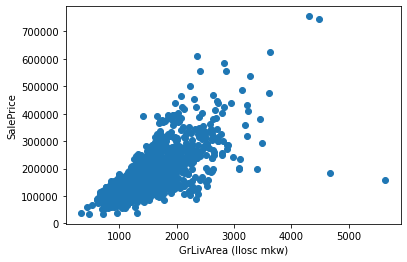

In [113]:
# Zilustryjmy trzy atrybuty o najwyzszej korelacji 
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea (Ilosc mkw)')

Text(0.5, 0, 'GarageCars (Ilosc miejsc parkingowych)')

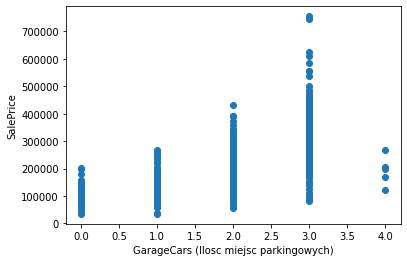

In [114]:
# Zilustryjmy trzy atrybuty o najwyzszej korelacji 
plt.scatter(x = train['GarageCars'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageCars (Ilosc miejsc parkingowych)')

In [115]:
# Wybierzmy tylko finalne atrybuty do train i test
test_final = test.loc[:,['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
train_final = train.loc[:,['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']]


In [116]:
# Usunmy wartosci odstajace z atrybutów: 
# wyjorzystamy do tego Z score: usuniete zostana wartosci które przekraczaja 3-krotnosc odchylenia standardowego: 


In [117]:
z = np.abs(stats.zscore(train_final))
print(z)

[[0.65147924 0.37033344 0.31172464 ... 1.05099379 0.87866809 0.34727322]
 [0.07183611 0.48251191 0.31172464 ... 0.15673371 0.42957697 0.00728832]
 [0.65147924 0.51501256 0.31172464 ... 0.9847523  0.83021457 0.53615372]
 ...
 [0.65147924 1.56964722 1.02685765 ... 1.00249232 1.02402865 1.07761115]
 [0.79515147 0.83278768 1.02685765 ... 0.70440562 0.53949344 0.48852299]
 [0.79515147 0.49393395 1.02685765 ... 0.20759447 0.96256569 0.42084081]]


In [118]:
threshold = 3
print(np.where(z > 3))

(array([  58,  118,  178,  178,  185,  185,  185,  197,  224,  224,  304,
        304,  332,  349,  375,  389,  440,  440,  440,  473,  496,  496,
        496,  496,  523,  523,  523,  527,  529,  533,  581,  591,  608,
        630,  635,  635,  664,  664,  691,  691,  691,  691,  747,  769,
        769,  769,  798,  798,  803,  803,  825,  897,  898,  898,  910,
       1024, 1031, 1044, 1044, 1046, 1061, 1132, 1137, 1142, 1169, 1169,
       1173, 1182, 1182, 1182, 1182, 1190, 1230, 1243, 1268, 1298, 1298,
       1298, 1298, 1298, 1349, 1350, 1353, 1373, 1373, 1373, 1386]), array([10,  1,  3, 10,  1,  7, 10,  1,  4,  5,  1,  8,  4, 10,  0, 10,  4,
        5, 10, 10,  1,  4,  5, 10,  1,  4,  5, 10,  5,  0,  3, 10,  1,  8,
        1,  7,  3, 10,  1,  4,  5, 10,  8,  1,  7, 10,  1, 10,  7, 10,  3,
        7,  5, 10,  7,  5,  7,  4,  5, 10,  3,  8,  8, 10,  1, 10,  7,  1,
        4,  5, 10,  3,  7, 10,  1,  1,  3,  4,  5,  7,  8,  7,  1,  4,  5,
       10,  7]))


In [119]:
Q1 = train_final.quantile(0.25)
Q3 = train_final.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

OverallQual         2.00
GrLivArea         647.25
GarageCars          1.00
GarageArea        241.50
TotalBsmtSF       502.50
1stFlrSF          509.25
FullBath            1.00
TotRmsAbvGrd        2.00
YearBuilt          46.00
YearRemodAdd       37.00
SalePrice       84025.00
dtype: float64


In [120]:
# Tym samym wiemy że wartosci odsające to takie gdzie: 
#  train_final < (Q1 - 1.5 * IQR)) oraz (train_final > (Q3 + 1.5 * IQR))
OverallQual_max = Q3.OverallQual + 1.5 * IQR.OverallQual
OverallQual_min = Q3.OverallQual - 1.5 * IQR.OverallQual
GrLivArea_max = Q3.GrLivArea + 1.5 * IQR.GrLivArea
GrLivArea_min = Q3.GrLivArea - 1.5 * IQR.GrLivArea
GarageArea_max = Q3.GarageArea + 1.5 * IQR.GarageArea
GarageArea_min = Q3.GarageArea - 1.5 * IQR.GarageArea
TotalBsmtSF_max = Q3.TotalBsmtSF + 1.5 * IQR.TotalBsmtSF
TotalBsmtSF_min = Q3.TotalBsmtSF - 1.5 * IQR.TotalBsmtSF
print('OverallQial max and min: ',OverallQual_max, OverallQual_min,'\n')
print('GrLivArea max and min: ',GrLivArea_max, GrLivArea_min,'\n')
print('GarageArea max and min: ',GarageArea_max, GarageArea_min,'\n')
print('TotalBsmtSF max and min: ',TotalBsmtSF_max, TotalBsmtSF_min,'\n')

OverallQial max and min:  10.0 4.0 

GrLivArea max and min:  2747.625 805.875 

GarageArea max and min:  938.25 213.75 

TotalBsmtSF max and min:  2052.0 544.5 



In [121]:
# Usuniecie wartosci odstajacych dla kilku wybranych atrybutów: 

train_final = train_final[train_final['OverallQual'] <= OverallQual_max.item()]
train_final = train_final[train_final['OverallQual'] >= OverallQual_min.item()]
train_final = train_final[train_final['GrLivArea'] <= GrLivArea_max.item()]
train_final = train_final[train_final['GrLivArea'] >= GrLivArea_min.item()]
train_final = train_final[train_final['GarageArea'] <= GarageArea_max.item()]
train_final = train_final[train_final['GarageArea'] >= GarageArea_min.item()]
train_final = train_final[train_final['TotalBsmtSF'] <= TotalBsmtSF_max.item()]
train_final = train_final[train_final['TotalBsmtSF'] >= TotalBsmtSF_min.item()]


In [122]:
train_final

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000,175000
1456,6,2073,2,500,1542,2073,2,7,1978,1988,210000
1457,7,2340,1,252,1152,1188,2,9,1941,2006,266500
1458,5,1078,1,240,1078,1078,1,5,1950,1996,142125


In [123]:
# encode dla wartosci kategorycznych
le = preprocessing.LabelEncoder()
for name in train_final.columns:
    if train_final[name].dtypes == 'O':
        train_final[name] = train_final[name].astype(str)
        le.fit(train_final[name])
        train_final[name] = le.transform(train_final[name])

In [124]:
# to samo dla test data 
for name in test_final.columns:
    if test_final[name].dtypes == 'O':
        test_final[name] = test_final[name].astype(str)
        le.fit(test_final[name])
        test_final[name] = le.transform(test_final[name])

In [125]:
# NaN zamienione na wartosc rowna prawdopodobiensktwu ich wystapienia 
for column in train_final.columns:
    null_vals = train_final.isnull().values
    a, b = np.unique(train_final.values[~null_vals], return_counts = 1)
    train_final.loc[train_final[column].isna(), column] = np.random.choice(a, train_final[column].isnull().sum(), p = b / b.sum())

In [126]:
# log transformation aby zredukowac skosnosc
skewed_train = train_final.apply(lambda x: skew(x.dropna()))
skewed_train = skewed_train[skewed_train > .75]
train_final[skewed_train.index] = np.log1p(train_final[skewed_train.index])

In [127]:
# to samo dla test data 
skewed_test = test_final.apply(lambda x: skew(x.dropna()))
skewed_test = skewed_test[skewed_test > .75]
test_final[skewed_test.index] = np.log1p(test_final[skewed_test.index])

In [128]:
X = train_final.drop(['SalePrice'], axis = 1)
y = train_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [129]:
lr = linear_model.LinearRegression()

In [130]:
model = lr.fit(X_train, y_train)

In [131]:
# predukcja
predictions = model.predict(X_test)

In [132]:
print ('MAE to:', mean_absolute_error(y_test, predictions))
print ('MSE to:', mean_squared_error(y_test, predictions))
print ('RMSE to:', sqrt(mean_squared_error(y_test, predictions)))

MAE to: 0.09523126815106761
MSE to: 0.016192305657742278
RMSE to: 0.1272489907926278


Text(0.5, 1.0, 'Model Regresji Liniowej')

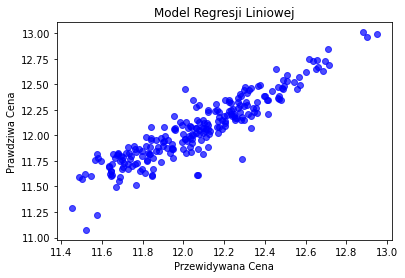

In [133]:

plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Przewidywana Cena')
plt.ylabel('Prawdziwa Cena')
plt.title('Model Regresji Liniowej')